## 1. Installing and importing libraries

### Installing *missingno* library

In [313]:
#!pip install missingno

### Importing the necessary libraries

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import reverse_geocoder as rg
import missingno as msno

## 2. Loading Seattle collision dataset and previewing it

In [315]:
#Reading in the CSV dataset by storing it in a dataframe and taking a look at the first 5 rows 
df = pd.read_csv("Collisions.csv")
print (df.head())

            X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO   STATUS  \
0 -122.292141  47.536087         1  308419     309699  3815053  Matched   
1 -122.335422  47.598752         2  308414     309694  3812507  Matched   
2 -122.331579  47.598746         3  308409     309689  3811477  Matched   
3 -122.334188  47.571578         4  308443     309723  3745916  Matched   
4         NaN        NaN         5  308438     309718  E870650  Matched   

  ADDRTYPE  INTKEY                                           LOCATION  ...  \
0    Block     NaN  BEACON WR AVE S BETWEEN S OTHELLO ST AND S WEB...  ...   
1    Block     NaN  ALASKAN E RDWY WAY S BETWEEN S JACKSON ST AND ...  ...   
2    Block     NaN       2ND AVE S BETWEEN S JACKSON ST AND S KING ST  ...   
3    Block     NaN  WEST SEATTLE BR WB BETWEEN 1ST AV S OFF RP AND...  ...   
4    Block     NaN  ALASKAN WY VI SB BETWEEN BATTERY ST TUNNEL SB ...  ...   

  ROADCOND                LIGHTCOND PEDROWNOTGRNT SDOTCOLNUM SPEEDING  \
0      

The data has been successfully imported into the notebook and we can observe the first five rows. Next, we take a look at the characteristics of the data by using the *info()* function.  

In [316]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212760 entries, 0 to 212759
Data columns (total 40 columns):
X                  205394 non-null float64
Y                  205394 non-null float64
OBJECTID           212760 non-null int64
INCKEY             212760 non-null int64
COLDETKEY          212760 non-null int64
REPORTNO           212760 non-null object
STATUS             212760 non-null object
ADDRTYPE           209100 non-null object
INTKEY             68758 non-null float64
LOCATION           208257 non-null object
EXCEPTRSNCODE      92356 non-null object
EXCEPTRSNDESC      11387 non-null object
SEVERITYCODE       212759 non-null object
SEVERITYDESC       212760 non-null object
COLLISIONTYPE      186862 non-null object
PERSONCOUNT        212760 non-null int64
PEDCOUNT           212760 non-null int64
PEDCYLCOUNT        212760 non-null int64
VEHCOUNT           212760 non-null int64
INJURIES           212760 non-null int64
SERIOUSINJURIES    212760 non-null int64
FATALITIES      

We have 212,760 rows and 40 columns as expected. Right away we can see which variables have some missing values. Also, the data type for each variable is listed which provides an idea about the different features. Variables such as *INTKEY (68758)*, *EXCEPTRSNCODE (92356)*, *EXCEPTRSNDESC (11387)* , *INATTENTIONIND (29116)*, *PEDROWNOTGRNT (4983)*, and *SPEEDING (9492)* are the ones with some of the most missing values. Later on, we will investigate whether we want to handle these missing values or simply get rid of the variables to prevent noisy information from creeping into the eventual mode. 

Next, we look at some summary statistics for the dataset using the *describe()* function. Note that data for only numerical values can be seen using this function as shown below. As shown below, variables such as *STATUS* or *JUNCTIONTYPE* are not there, which makes sense since those are categorical variables. 

At the moment, this table is not too readable due to the large number of variables present. Once we select the variables that we need, this task can be repeated to get more meaningful information from the statistics. 

In [317]:
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,205394.000000,205394.000000,212760.000000,212760.000000,212760.000000,68758.000000,212760.000000,212760.000000,212760.000000,212760.000000,212760.000000,212760.000000,212760.000000,212759.000000,1.272050e+05,212760.000000,2.127600e+05
mean,-122.330770,47.620350,106380.500000,137252.897551,137429.512390,37406.299921,2.224718,0.037319,0.026927,1.725564,0.373505,0.015040,0.001645,13.352751,7.971063e+06,267.307379,9.555872e+03
std,0.030051,0.055914,61418.665974,82700.865332,83001.493498,51036.166501,1.480025,0.199451,0.163316,0.833282,0.733918,0.158424,0.044188,7.323943,2.611523e+06,3287.026621,7.140690e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349311,47.577787,53190.750000,69476.750000,69476.750000,28649.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330399,47.616172,106380.500000,122859.500000,122859.500000,29969.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311993,47.664293,159570.250000,198670.250000,198810.250000,33963.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,212760.000000,323050.000000,324550.000000,725404.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


## 3. Selecting initial variables

Before filtering the variables, it is important to define each variable and provide proper descriptions in order to understand them better. 

First, the important variables are defined followed by the variables that are to be excluded. 

### Variables to be retained:
- *X*: X coordinate of location
- *Y*: Y coordinate of location
- *STATUS*: Whether the incident has been matched or not
- *ADDRTYPE*: Address type (alley, block, intersection)
- *SEVERITYCODE*: Level of severity (fatal, serious etc). Interestingly, only one entry seems to be missing for this variable. 
- *COLLISIONTYPE*: Whether the collision was due to a *sideswipe*, *rear-ending*, *angles* etc. 
- *PERSONCOUNT*: Number of people involved in the collision
- *PEDCOUNT*: Number of pedestrians involved in the collision
- *PEDCYLCOUNT*: Number of bicycles involved in the collision
- *VEHCOUNT*: Number of vehicles involved in the collision
- *INJURIES*: Number of injuries as a result of the collision
- *SERIOUSINJURIES*: Number of serious injuries as a result of the collision
- *FATALITIES*: Number of fatalities as a result of the collision
- *INCDTTM*: Date and time of incident
- *JUNCTIONTYPE*: Mid-block or intersection
- *SDOT_COLDESC*: Description of collisions from SDOT
- *ST_COLDESC*: Description of collisions from the state 
- *UNDERINFL*: Whether the driver was under the influence or not
- *WEATHER*: Weather conditions during incident
- *ROADCOND*: Road conditions during incident
- *LIGHTCOND*: Light conditions during incident
- *HITPARKEDCAR*: Whether the collision was due to hitting a parked car or not

### Variables to be excluded (and reasoning): 
- *OBJECTID*: Same values as the default dataframe indexes
- *INCKEY*: Contains unique values for each collision incident. Hence it would not provide much information for our model
- *COLDETKEY*: Same reason as above
- *REPORTNO*: Same reason as above
- *INTKEY*: Only 68,578 instances
- *LOCATION*: Latitude and longitude information can be used for more accurate location data
- *EXCEPTRSNCODE*: Only 92,356 entries. 
- *EXCEPTRSNDESC*: Only 11,387 entries. 
- *INCDATE*: Only contains date information while variable INCDTTM contains both date and time info. Keeping INCDTTM in the dataset. 
- *INATTENTIONIND*: Too few entries - 29,116. Filling the missing values will not make sense as there are not enough meaningful values to use as reference in the first place.
- *PEDROWNOTGRNT*: Only 4983 entries. 
- *SDOTCOLNUM*: Only 127205 entries. 
- *SDOT_COLCODE*: Contains the exact same information as SDOT_COLDESC which contains more detailed information. 
- *SPEEDING*: Only 9492 entries. 
- *ST_COLCODE*: Contains the exact same information as ST_COLDESC which contains more detailed descriptions for each collision type
- *SEGLANEKEY*: Contained more than 2000 unique categories making it difficult to analyze
- *CROSSWALK*: Contained more than 2000 unique categories making it difficult to analyze
- *SEVERITYCODE*: Contains the exact same information as SEVERITYDESC except it contains character codes instead of entire texts. Also SEVERITYDESC contains a better explanation of the different severity levels.

The analysis showing why the above variables were excluded is shown below. 

### OBJECTID, INCKEY, INTKEY, COLDETKEY and REPORTNO

In [318]:
#Checking if there are as many unique object IDs as incidents
print ("Number of unique object IDs: ",len(df["OBJECTID"].unique()))

#Checking if there are as many unique incident IDs as incidents
print ("Number of unique incident keys: ",len(df["INCKEY"].unique()))

#Checking if there are as many unique INTKEY instances as incidents
print ("Number of unique INTKEY: ",len(df["INTKEY"].unique()))

#Checking the amount of unique secondary incident IDs
print ("Number of unique secodary incident keys: ",len(df["COLDETKEY"].unique()))

#Checking the amount of unique report no values
print ("Number of unique report numbers: ",len(df["REPORTNO"].unique()))

Number of unique object IDs:  212760
Number of unique incident keys:  212760
Number of unique INTKEY:  7780
Number of unique secodary incident keys:  212760
Number of unique report numbers:  212757


What the above results tell us is that these variables contain 212,760 or nearly 212,760 unique values which means there are that many categorical values to analyze. This would provide very little information for our model. *INTKEY*, on the other hand, contains very few instances so it does not provide much information. 

### EXCEPTRSNCODE and EXCEPTRSNDESC

These two variables contains very few entries in the dataset and also provide very little meaningful information. Therefore, they need to be dropped. 

In [319]:
print (df['EXCEPTRSNCODE'].value_counts())
print ()
print (df['EXCEPTRSNDESC'].value_counts())

       80969
NEI    11387
Name: EXCEPTRSNCODE, dtype: int64

Not Enough Information, or Insufficient Location Information    11387
Name: EXCEPTRSNDESC, dtype: int64


### INCDTTM and INCDATE

For conducting time series analysis, the dataset contains two variables - *INCDATE* and *INCDTTM*. However, only the latter is retained since it contains both date and time information. For easier analysis, the variable is transformed into the pandas datetime format. 

In [320]:
#Coverting date/time variables from string format to pandas datetime format for easier timeseries analysis
df['INCDTTM'] = df['INCDTTM'].apply(pd.to_datetime)
print (df['INCDTTM'][:10])

0   2018-12-12 15:49:00
1   2018-12-16 02:44:00
2   2018-12-17 13:26:00
3   2018-12-20 02:25:00
4   2018-12-04 15:37:00
5   2018-12-14 17:33:00
6   2018-12-19 16:07:00
7   2018-12-17 13:50:00
8   2018-12-19 18:20:00
9   2018-12-20 04:55:00
Name: INCDTTM, dtype: datetime64[ns]


### SDOT_COLCODE, SDOT_COLDESC, ST_COLCODE and ST_COLDESC

Analyzing the variables *SDOT_COLCODE* and *SDOT_COLDESC* revealed that both these variables essentially provide the same information, in terms of features for prediction, the first contains discrete numbers for each type of collision while the latter contains descriptions for each type. The results are similar for the variables *ST_COLCODE* and *ST_COLDESC*. 

In [321]:
print ("Number of unique codes for collision type assigned by SDOT: ",len(df['SDOT_COLCODE'].unique()))
print ("Number of unique values for collision description assigned by SDOT: ",len(df['SDOT_COLDESC'].unique()))
print ("Number of unique codes for collision type assigned by the state: ",len(df['ST_COLCODE'].unique()))
print ("Number of unique values for collision description assigned by the state: ",len(df['ST_COLDESC'].unique()))

Number of unique codes for collision type assigned by SDOT:  40
Number of unique values for collision description assigned by SDOT:  40
Number of unique codes for collision type assigned by the state:  64
Number of unique values for collision description assigned by the state:  63


MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          87987
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    56967
NOT ENOUGH INFORMATION / NOT APPLICABLE                         18842
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE         10597
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    9222
MOTOR VEHCILE STRUCK PEDESTRIAN                                  7279
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           6706
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4759
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3267
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1750
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1740
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1421
MOTOR VEHICLE OVERTURNED IN ROAD                                  555
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       203
PEDALCYCLIST STRUCK 

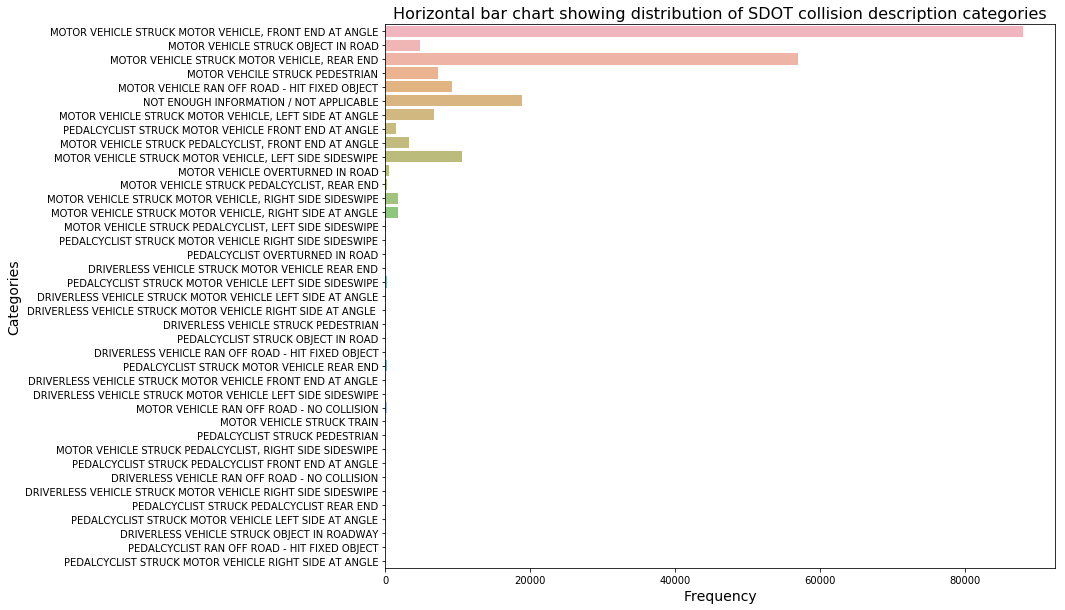

In [322]:
#Displaying frequencies of SDOT_COLDESC categories
print (df['SDOT_COLDESC'].value_counts())

#Plotting the same frequencies in a horizontal bar chart
plt.figure(figsize=(12,10))
plt.title("Horizontal bar chart showing distribution of SDOT collision description categories",size=16)
sns.countplot(y='SDOT_COLDESC',data=df,alpha=0.7)
plt.xlabel("Frequency",size=14)
plt.ylabel("Categories",size=14)
plt.show()

One parked--one moving                                                                   43515
Entering at angle                                                                        33804
From same direction - both going straight - one stopped - rear-end                       25203
Fixed object                                                                             13432
From same direction - both going straight - both moving - sideswipe                      12327
From opposite direction - one left turn - one straight                                   10210
From same direction - both going straight - both moving - rear-end                        7412
Vehicle - Pedalcyclist                                                                    5084
From same direction - all others                                                          4408
Vehicle going straight hits pedestrian                                                    3349
From same direction - one left turn - one straight

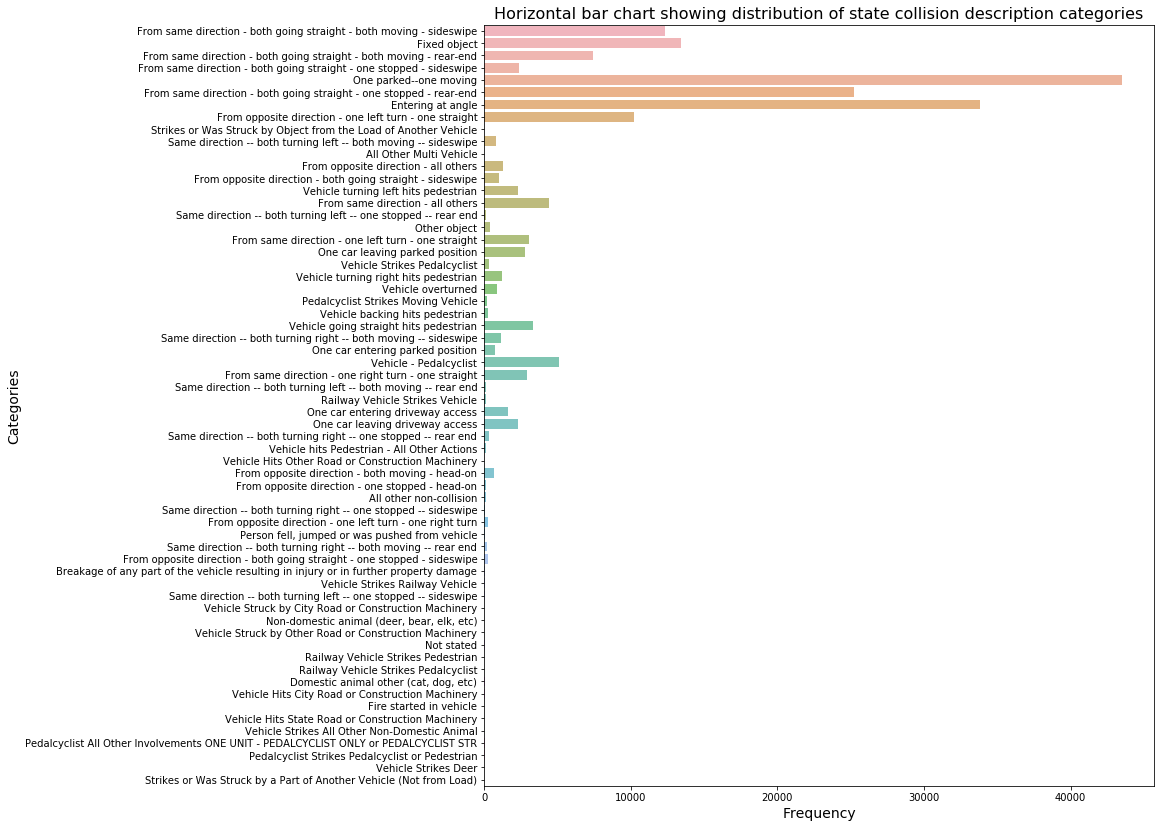

In [323]:
#Displaying the frequencies of categories of ST_COLDESC 
print (df['ST_COLDESC'].value_counts())

#Plotting the same frequencies in a horizontal bar chart
plt.figure(figsize=(12,14))
plt.title("Horizontal bar chart showing distribution of state collision description categories",size=16)
sns.countplot(y='ST_COLDESC',data=df,alpha=0.7)
plt.xlabel("Frequency",size=14)
plt.ylabel("Categories",size=14)
plt.show()

In [324]:
print ("Printing the category frequencies for ST_COLCODE")
df['ST_COLCODE'].value_counts()

Printing the category frequencies for ST_COLCODE


32    43515
10    33804
14    25203
      16485
50    13432
11    12327
28    10210
13     7412
45     5084
23     4408
0      3349
15     3017
16     2898
20     2752
12     2335
22     2292
2      2266
21     1646
30     1298
1      1223
71     1144
26     1012
52      893
81      808
19      698
24      645
51      368
74      338
5       317
29      280
      ...  
73      162
25      133
4       127
57      103
40       99
84       89
83       83
72       71
41       56
64       50
31       44
82       34
48       33
56       32
53       31
7        19
8        16
42       12
66       11
65       11
67        9
88        7
54        7
17        4
43        2
87        2
18        2
85        1
49        1
60        1
Name: ST_COLCODE, Length: 63, dtype: int64

It appears that *ST_COLCODE* consists of more non-null values than *ST_COLDESC* only because the former contains a 'blank' cateogory which does not state a specific code. If this category's frequency of 16,485 is added to that of *ST_COLDESC*, both variables will then have the same number of observations in the dataset. 

From the analysis of the collision description variables above, it appears that the SDOT and ST variables provide different types of categories when it comes to the nature of the collision. Therefore, it would be important to include both in the dataset. However, as mentioned earlier, the variables providing codes will be dropped while the ones with descriptions will be retained for further analysis. 

### INATTENTIONIND

Below, the variable *INATTENTIONIND*  is explored and we find that it only contains 29,116 instances of the value 'Y' which indicates that the driver was not paying attention during the collision event. Since no other entries exist for this variable, it would provide little information if included in a model. Also, since the number of entries is so low, there is no merit in filling in the missing values as well. 

In [325]:
#Finding out the frequency of each type of value for 'INATTENTIONIND'
print ("Displaying the frequency of the INATTENTIONIND variable")
print ()
df['INATTENTIONIND'].value_counts()

Displaying the frequency of the INATTENTIONIND variable



Y    29116
Name: INATTENTIONIND, dtype: int64

### SEVERITYCODE and SEVERITYDESC

Next, the two severity variables *SEVERITYCODE* and *SEVERITYDESC* are explored and we notice that both provide the exact same information. For our modeling purposes, only one of the variables is required. Therefore, we can drop *SEVERITYCODE* since *SEVERITYDESC* provides more information. 

In [326]:
#Finding out the frequency of each type of value for 'INATTENTIONIND'
severity = pd.DataFrame()
severity['severity'] = df['SEVERITYDESC'].value_counts()
severity['percent'] = (severity['severity']/sum(severity['severity'])*100)
print ("Displaying the frequency of severity categories")
print ()
print (severity)

Displaying the frequency of severity categories

                                severity    percent
Property Damage Only Collision    132375  62.217992
Injury Collision                   56299  26.461271
Unknown                            20786   9.769694
Serious Injury Collision            2972   1.396879
Fatality Collision                   328   0.154164


In [327]:
#Finding out the frequency of each type of value for 'INATTENTIONIND'
print ("Displaying the frequency of severity codes")
print ()
print (df['SEVERITYCODE'].value_counts())

Displaying the frequency of severity codes

1     132375
2      56299
0      20785
2b      2972
3        328
Name: SEVERITYCODE, dtype: int64


### SDOTCOLNUM

The variable *SDOTCOLNUM* stores unique numbers provided to each collision. Therefore this feature will not provide much information in terms of modeling. Also, it contains just 127,187 entries. Hence, we can get rid of this variable. 

In [328]:
#Printing the number of unique entries for SDOTCOLNUM 
print ("Number of unique entries for SDOTCOLNUM: ",len(df['SDOTCOLNUM'].unique()))

Number of unique entries for SDOTCOLNUM:  127187


### SEGLANEKEY

Looking at the *SEGLANEKEY* variable, it contains 2084 unique values out of which the value '0' is by far the majority accounting for 209,761 of the observations. The second highest key '6078' contains just 19 instances. Overall, the rest of the keys contain just 2999 of the instances, hence the distribution for this variable is highly skewed.

In [329]:
print ("Number of unique values in SEGLANEKEY: ",len(df['SEGLANEKEY'].unique()))
print ()
print (df['SEGLANEKEY'].value_counts())

Number of unique values in SEGLANEKEY:  2084

0        209761
6078         19
6532         19
12162        18
10336        15
10342        12
10420        12
8985         12
8816         12
10354        10
10368         9
10590         9
12179         9
8995          8
10374         8
10773         8
8990          7
42777         7
10566         7
12941         7
12788         6
6292          6
10532         6
12649         6
23507         6
12035         6
2426          6
8240          6
42680         6
6322          6
          ...  
1873          1
6355          1
4178          1
14281         1
24389         1
7502          1
11720         1
3532          1
24134         1
2255          1
10827         1
6861          1
41818         1
19911         1
7757          1
36575         1
38748         1
9803          1
34782         1
10442         1
24899         1
20933         1
8651          1
13001         1
35934         1
21701         1
15688         1
17863         1
20038     

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


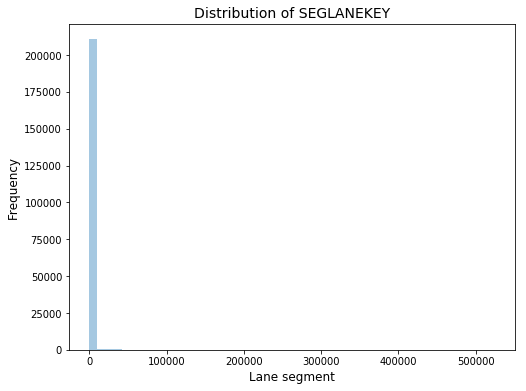

In [330]:
#Distribution of SEGLANEKEY values
plt.figure(figsize=(8,6))
sns.distplot(df['SEGLANEKEY'],kde=False)
plt.title("Distribution of SEGLANEKEY",size=14)
plt.xlabel("Lane segment",size=12)
plt.ylabel("Frequency",size=12)
plt.show()

One way this variable could be useful is if we separate the lane keys into '0' and the rest. However, due to the high frequency for the '0' category, this variable will possibly not be too useful for our analysis. 

### CROSSWALKKEY

We now look at the *CROSSWALKKEY* variabe which denotes the crosswalk at which the collision occurred. This variable contains 2284 unique values from which crosswalk '0' contains 208,685 instances making this data highly skewed, similar to the *SEGLANEKEY* variable. 

Due to the skewness as well as the high number of unique values, we may need to drop this variable as well.  

Number of unique categories for CROSSWALKKEY 2284

Category frequencies for CROSSWALKKEY
0         208685
523609        18
520838        15
525567        13
524265        12
523148        11
523699        10
521707        10
523735        10
521863         9
522891         9
524178         9
521574         9
523109         9
521604         9
521253         9
524029         9
522264         8
525566         8
522377         8
523176         8
521750         8
520855         8
525659         8
521040         8
524689         8
523987         8
525644         8
522108         8
520807         7
           ...  
32855          1
522424         1
524793         1
522426         1
524219         1
668165         1
522427         1
524995         1
521021         1
521405         1
523580         1
525635         1
523708         1
167698         1
524092         1
522299         1
30795          1
524484         1
524091         1
631152         1
522811         1
522939         1
523195    

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


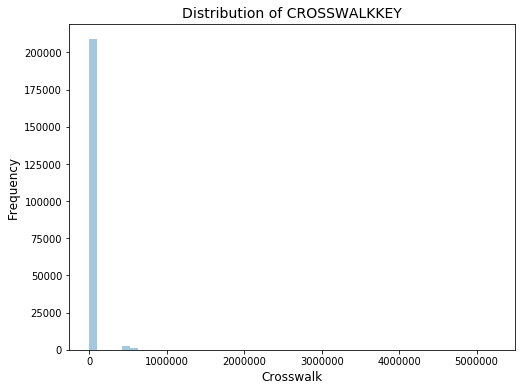

In [331]:
print ("Number of unique categories for CROSSWALKKEY",len(df['CROSSWALKKEY'].unique()))
print ()
print ("Category frequencies for CROSSWALKKEY")
print (df['CROSSWALKKEY'].value_counts())

#Distribution of CROSSWALKKEY values
plt.figure(figsize=(8,6))
sns.distplot(df['CROSSWALKKEY'],kde=False)
plt.title("Distribution of CROSSWALKKEY",size=14)
plt.xlabel("Crosswalk",size=12)
plt.ylabel("Frequency",size=12)
plt.show()

### PEDROWNOTGRNT

In [332]:
print ("Displaying the frequency of PEDROWNOTGRNT categories")
print ()
print (df['PEDROWNOTGRNT'].value_counts())

Displaying the frequency of PEDROWNOTGRNT categories

Y    4983
Name: PEDROWNOTGRNT, dtype: int64


This variable contains very few instances. It's interesting that it only contains 'Y' responses. It is difficult to tell whether we are supposed to assume if the other responses are naturally a 'N'. Since there are other Y/N variables in this dataset that have responses for both values, we should be safe to assume that this variable in fact just contains 'Y' responses. 

### SPEEDING

In [333]:
print ("Displaying the frequency of SPEEDING categories")
print ()
print (df['SPEEDING'].value_counts())

Displaying the frequency of SPEEDING categories

Y    9492
Name: SPEEDING, dtype: int64


*SPEEDING* has a similar issue where there are only 'Y' responses and there are very few of them. 

### LOCATION

In [334]:
print ("Number of unique locations: ",len(df['LOCATION'].unique()))
print ()
print ("Frequency of different locations")
print (df['LOCATION'].value_counts())

Number of unique locations:  24883

Frequency of different locations
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                292
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          271
6TH AVE AND JAMES ST                                                                    258
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          257
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                256
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   244
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              230
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    207
AURORA BR B

The *LOCATION* variable contains very specific address information in text format which makes it difficult to analyze. Above, we analyze this variable and find out that there are 24,883 unique location values, which means there are that many categories of location. 

Also, since we have latitude and longitude values, we can extract more specific location attributes which could help us analyze the data better. 

Dropping columns that are not required

In [335]:
df = df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDATE','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SDOT_COLCODE','SPEEDING','ST_COLCODE','SEVERITYCODE','SEGLANEKEY','CROSSWALKKEY'],axis='columns')
df.head()

,X,Y,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,FATALITIES,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR
0,-122.292141,47.536087,Matched,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,0,2018-12-12 15:49:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Raining,Wet,Daylight,From same direction - both going straight - bo...,N
1,-122.335422,47.598752,Matched,Block,Property Damage Only Collision,Other,1,0,0,1,...,0,2018-12-16 02:44:00,Mid-Block (not related to intersection),MOTOR VEHICLE STRUCK OBJECT IN ROAD,N,Raining,Wet,Dark - Street Lights On,Fixed object,N
2,-122.331579,47.598746,Matched,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,0,2018-12-17 13:26:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Dry,Daylight,From same direction - both going straight - bo...,N
3,-122.334188,47.571578,Matched,Block,Property Damage Only Collision,Other,2,0,0,1,...,0,2018-12-20 02:25:00,Mid-Block (not related to intersection),MOTOR VEHICLE STRUCK OBJECT IN ROAD,Y,Raining,Wet,Dark - Street Lights On,Fixed object,N
4,NaN,NaN,Matched,Block,Property Damage Only Collision,Rear Ended,3,0,0,2,...,0,2018-12-04 15:37:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Clear or Partly Cloudy,Dry,Daylight,From same direction - both going straight - bo...,N


From the output of the dataframe above, we can confirm that the 18 undesired columns have been removed and we are left with 22 columns. Note that this filtering process is only for the initial analysis. More columns may need to be excluded during the exploratory data analysis (EDA) phase. 

## 4. Renaming the columns

This is done so that the variable names are more human-readable and so too cryptic to new users. 

In [336]:
#Displaying the existing columns
print(pd.Series(df.columns))

0                   X
1                   Y
2              STATUS
3            ADDRTYPE
4        SEVERITYDESC
5       COLLISIONTYPE
6         PERSONCOUNT
7            PEDCOUNT
8         PEDCYLCOUNT
9            VEHCOUNT
10           INJURIES
11    SERIOUSINJURIES
12         FATALITIES
13            INCDTTM
14       JUNCTIONTYPE
15       SDOT_COLDESC
16          UNDERINFL
17            WEATHER
18           ROADCOND
19          LIGHTCOND
20         ST_COLDESC
21       HITPARKEDCAR
dtype: object


In [337]:
#Creating a list with the new column names
NewColNames = ['Longitude','Latitude','Status','Address Type','Severity Description','Collision Type','Number of People Involved','Number of Pedestrians Involved','Number of Bicycles Involved','Number of Vehicles Involved','Number of Injuries','Number of Serious Injuries','Number of Fatalities','Incident Date and Time','Junction Type','SDOT Collision Description','DUI','Weather','Road Condition','Light Condition','STATE Collision Description','Hit Parked Car']
print ("Number of new columns: ",len(NewColNames))

Number of new columns:  22


In [338]:
#Assigning new column names to the main dataframe
df.columns = NewColNames
print (df.head())

    Longitude   Latitude   Status Address Type  \
0 -122.292141  47.536087  Matched        Block   
1 -122.335422  47.598752  Matched        Block   
2 -122.331579  47.598746  Matched        Block   
3 -122.334188  47.571578  Matched        Block   
4         NaN        NaN  Matched        Block   

             Severity Description Collision Type  Number of People Involved  \
0  Property Damage Only Collision      Sideswipe                          2   
1  Property Damage Only Collision          Other                          1   
2  Property Damage Only Collision      Sideswipe                          2   
3  Property Damage Only Collision          Other                          2   
4  Property Damage Only Collision     Rear Ended                          3   

   Number of Pedestrians Involved  Number of Bicycles Involved  \
0                               0                            0   
1                               0                            0   
2                         

We now have a filtered dataset with the initial variables that we need and meaningful column names. The output above shows the updated dataframe. 

## 5. Handling missing values

The dataset can be cleaned further by filling or removing missing values. To check which variables still have missing values, we use the *.info()* function again on the updated dataset. 

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212760 entries, 0 to 212759
Data columns (total 22 columns):
Longitude                         205394 non-null float64
Latitude                          205394 non-null float64
Status                            212760 non-null object
Address Type                      209100 non-null object
Severity Description              212760 non-null object
Collision Type                    186862 non-null object
Number of People Involved         212760 non-null int64
Number of Pedestrians Involved    212760 non-null int64
Number of Bicycles Involved       212760 non-null int64
Number of Vehicles Involved       212760 non-null int64
Number of Injuries                212760 non-null int64
Number of Serious Injuries        212760 non-null int64
Number of Fatalities              212760 non-null int64
Incident Date and Time            212760 non-null datetime64[ns]
Junction Type                     201032 non-null object
SDOT Collision Description     

### Variables that contain missing values:
- Longitude
- Latitude
- Address Type 
- Collision Type
- Junction Type
- SDOT Collision Code
- SDOT Collision Description
- DUI: Converted to "Unknown" category
- Weather: Converted to "Unknown" category
- Road Condition: Converted to "Unknown" category
- Light Condition: Converted to "Unknown" category

To get a better understanding of the missing data across all variables in the dataset, we can visualize these missing values using the *missingno* library. 

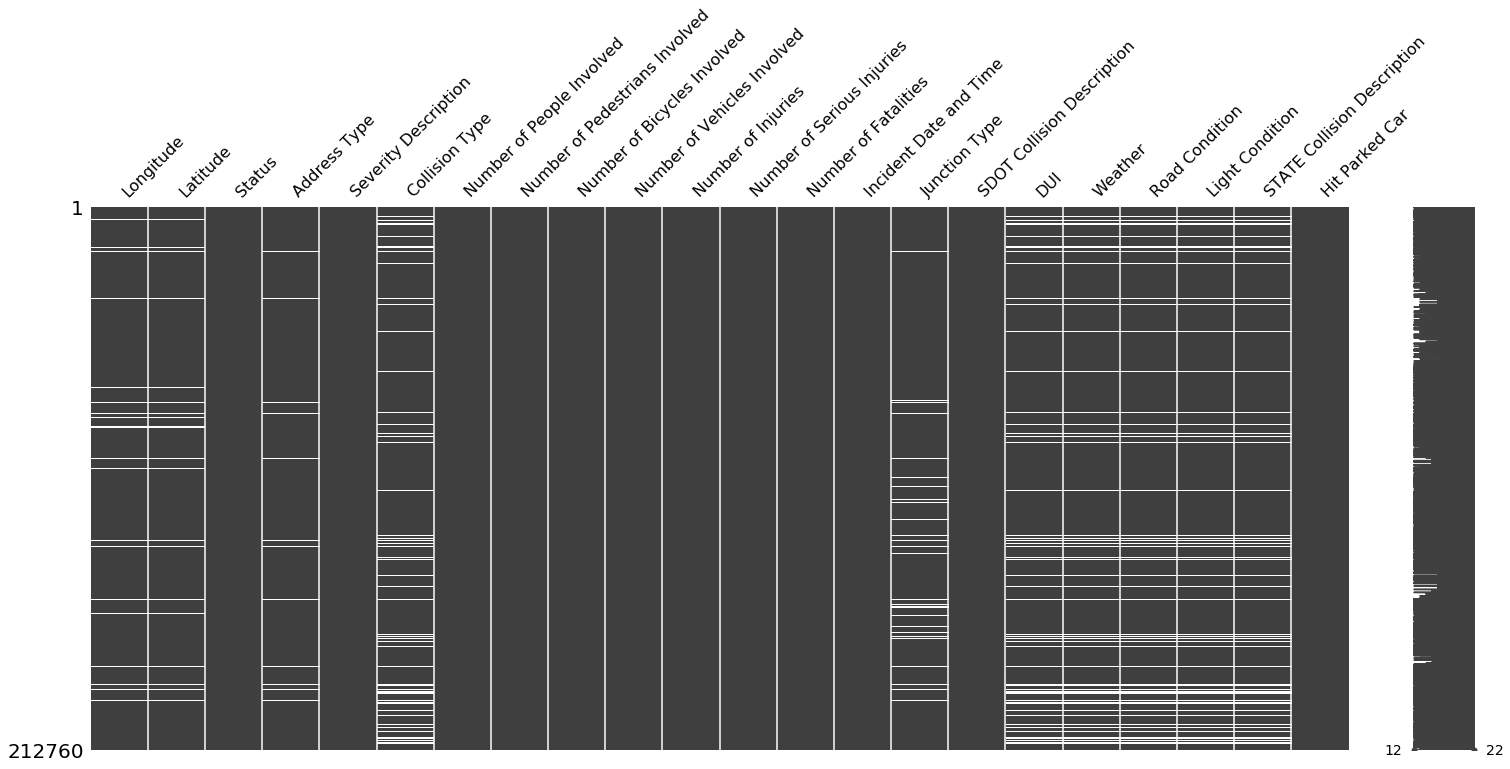

In [340]:
msno.matrix(df)

Looking at the visualization above, there are several noticeable things that catch the eye immediately:
- Variables such as *DUI, Weather, Road Condition* and *Light Condition* have missing values for essentially the same rows. Another variable that matches these variables in terms of missing value but is not immediately obvious is *Collision Type*, which is the seventh column from the left. 
- Variables *Longitude* and *Latitude* share the same missing values while *Address Type* shares missing values for certain rows but not all. 
- *Junction Type* consists of a unique set of missing values which will be interesting to handle
- Other variables such as *Status*, *Severity Description* and *Number of Injuries* contain almost all the rows. If there are very few missing values, it is difficult to tell from this matrix plot but this can be confirmed from the table we formed using the *.info()* function.

Below, we start tackling the missing values for each variable individually

### Latitude and Longitude

Since only 7,366 instances are missing for this variable, we can in fact drop these observations. Since this is very specific location data, the missing values would be hard to fill in. The only other location variable in this dataset, *LOCATION*, contained very specific addresses and street descriptions with which it would have been difficult to predict the latitude and longitude values. 

However, before dropping these rows, let's first look at how the missing values for the coordinates correlate with those of the variable *Address Type* since we have noticed some correlation between the missing values across these variables in the matrix visualization above.

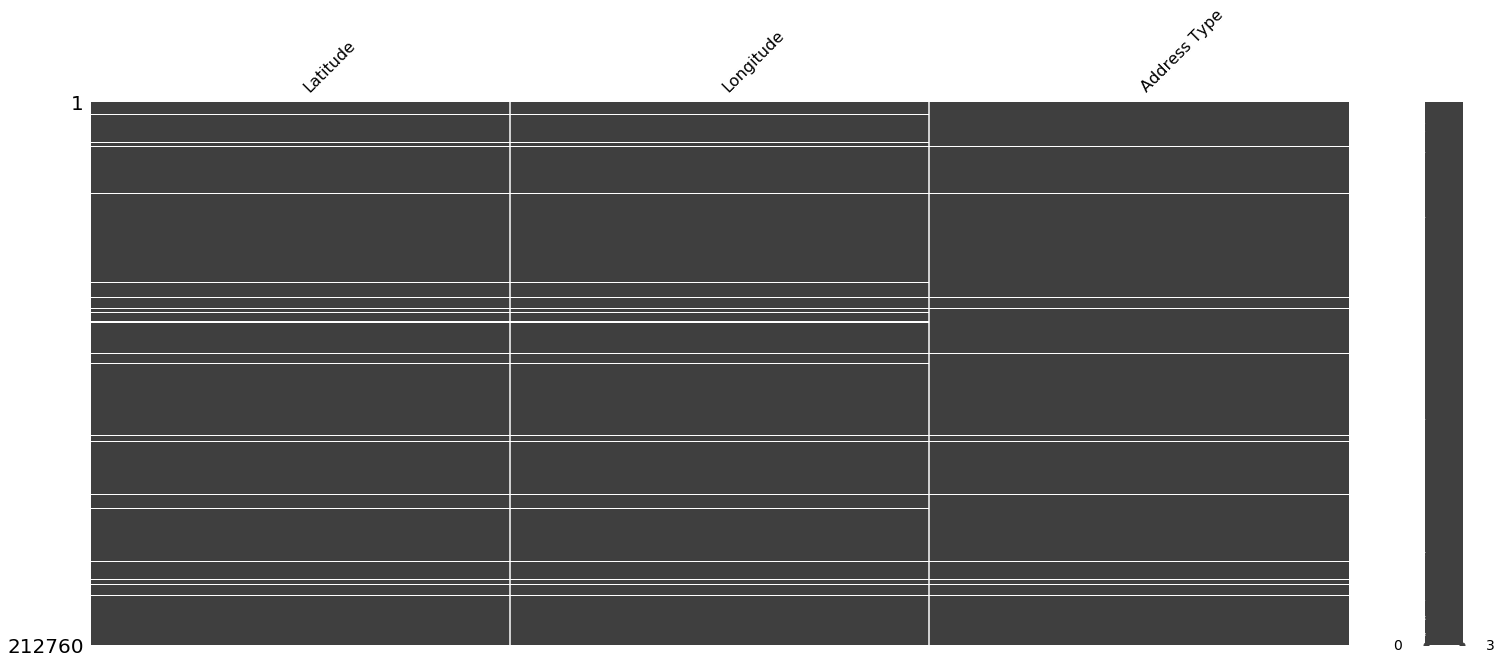

In [341]:
msno.matrix(df[['Latitude','Longitude','Address Type']])

In the plot below, we once again visualize the missing values but this time only for *Latitude*, *Longitude* and *Address Type*. We can notice that the missing values for *Address Type* are contained within the missing values for the coordinates. This would indicate that if we drop the null values for the coordinates, that would likely result in the null values for *Address Type* also being dropped. Let's go ahead and verify that. 

In [342]:
#Dropping null values for latitude and longitude
df = df.dropna(subset=['Latitude','Longitude'])
df[['Latitude','Longitude','Address Type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205394 entries, 0 to 212759
Data columns (total 3 columns):
Latitude        205394 non-null float64
Longitude       205394 non-null float64
Address Type    205394 non-null object
dtypes: float64(2), object(1)
memory usage: 6.3+ MB


From the table above, we can now confirm that the number of missing values for *Address Type* was a subset of the missing values for the coordinates. Therefore, removing them for the coordinates did the same for the address variable as well, leaving us with 205,393 entries for each variable. 

Below we continue analyzing the missing values for each variable starting with *Address Type*.

### Address Type

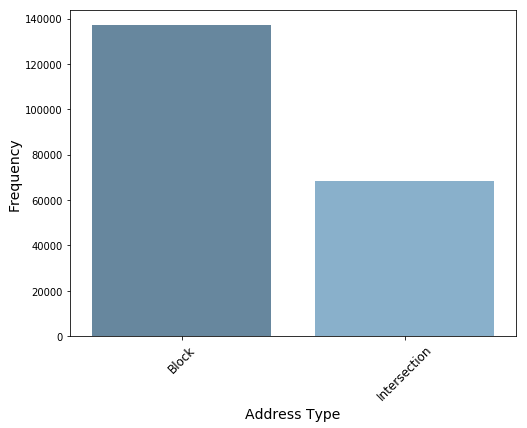

Block           136971
Intersection     68423
Name: Address Type, dtype: int64

Total non-missing entries for Address Type:  205394


In [343]:
#Plotting the distribution of Address Type categories
plt.figure(figsize=(8,6))
sns.countplot(x='Address Type',data=df,palette='Blues_d',alpha=0.8)
plt.xticks(rotation=45,size=12)
plt.xlabel("Address Type",size=14)
plt.ylabel("Frequency",size=14)
plt.show()
print (df['Address Type'].value_counts())
print ()
print ("Total non-missing entries for Address Type: ",df['Address Type'].value_counts().sum())

### Weather

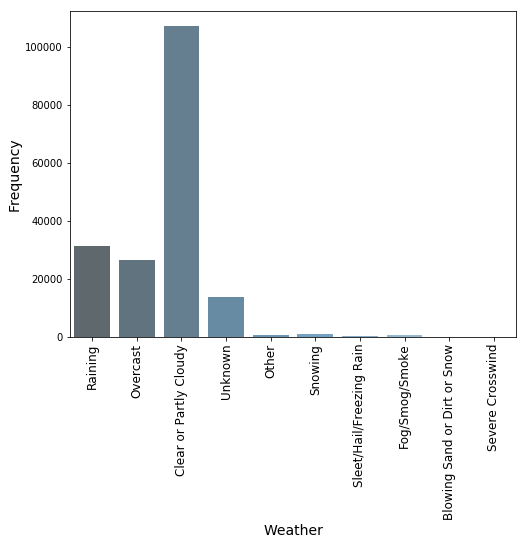

Clear or Partly Cloudy          107245
Raining                          31474
Overcast                         26612
Unknown                          13824
Snowing                            882
Other                              745
Fog/Smog/Smoke                     548
Sleet/Hail/Freezing Rain           109
Blowing Sand or Dirt or Snow        48
Severe Crosswind                    25
Name: Weather, dtype: int64

Total non-missing entries for Weather:  181512


In [344]:
#Plotting the distribution of Weather categories
plt.figure(figsize=(8,6))
sns.countplot(x='Weather',data=df,palette='Blues_d',alpha=0.8)
plt.xticks(rotation=90,size=12)
plt.xlabel("Weather",size=14)
plt.ylabel("Frequency",size=14)
plt.show()
print (df['Weather'].value_counts())
print ()
print ("Total non-missing entries for Weather: ",df['Weather'].value_counts().sum())

### Road Condition

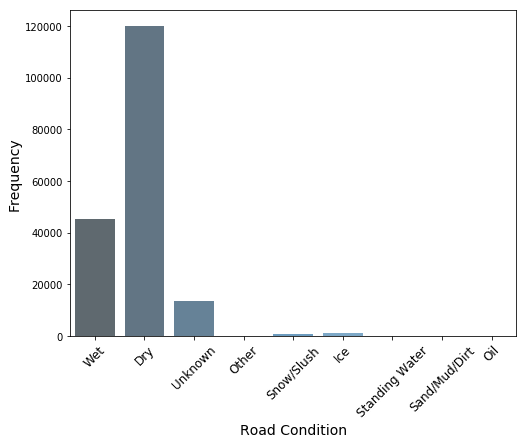

Dry               120195
Wet                45172
Unknown            13713
Ice                 1178
Snow/Slush           988
Other                112
Standing Water       101
Sand/Mud/Dirt         64
Oil                   50
Name: Road Condition, dtype: int64

Total non-missing entries for Road Condition:  181573


In [345]:
#Plotting distributions for Road Condition categories
plt.figure(figsize=(8,6))
sns.countplot(x='Road Condition',data=df,palette='Blues_d',alpha=0.8)
plt.xticks(rotation=45,size=12)
plt.xlabel("Road Condition",size=14)
plt.ylabel("Frequency",size=14)
plt.show()
print (df['Road Condition'].value_counts())
print ()
print ("Total non-missing entries for Road Condition: ",df['Road Condition'].value_counts().sum())

### Light Condition

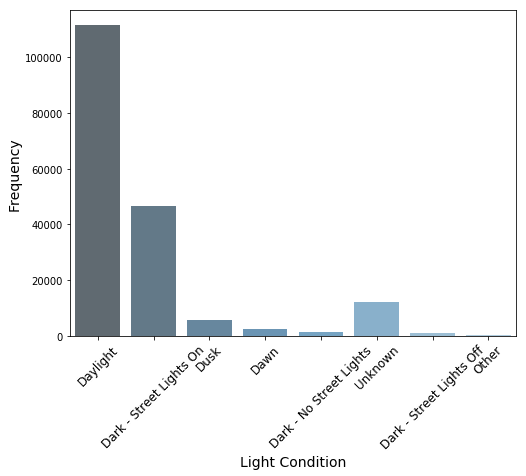

Daylight                    111552
Dark - Street Lights On      46704
Unknown                      12329
Dusk                          5711
Dawn                          2383
Dark - No Street Lights       1415
Dark - Street Lights Off      1151
Other                          179
Name: Light Condition, dtype: int64

Total non-missing entries for Light Condition:  181424


In [346]:
#Plotting distributions for Light Condition categories
plt.figure(figsize=(8,6))
sns.countplot(x='Light Condition',data=df,palette='Blues_d',alpha=0.8)
plt.xticks(rotation=45,size=12)
plt.xlabel("Light Condition",size=14)
plt.ylabel("Frequency",size=14)
plt.show()
print (df['Light Condition'].value_counts())
print ()
print ("Total non-missing entries for Light Condition: ",df['Light Condition'].value_counts().sum())

### Severity Description

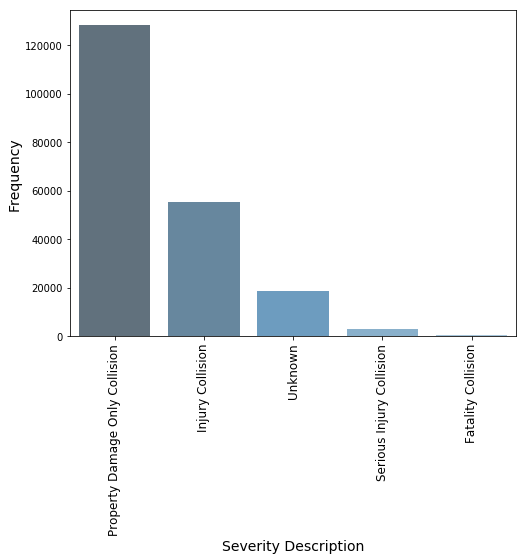

Property Damage Only Collision    128158
Injury Collision                   55239
Unknown                            18762
Serious Injury Collision            2916
Fatality Collision                   319
Name: Severity Description, dtype: int64

Total non-missing entries for Severity Description:  205394


In [347]:
#Plotting distributions for Severity Description categories
plt.figure(figsize=(8,6))
sns.countplot(x='Severity Description',data=df,palette='Blues_d',alpha=0.8)
plt.xticks(rotation=90,size=12)
plt.xlabel("Severity Description",size=14)
plt.ylabel("Frequency",size=14)
plt.show()
print (df['Severity Description'].value_counts())
print ()
print ("Total non-missing entries for Severity Description: ",df['Severity Description'].value_counts().sum())

### DUI

In [348]:
#Plotting distributions for DUI categories
print (df['DUI'].value_counts())
print ()
print ("Total non-missing entries for DUI: ",df['DUI'].value_counts().sum())

N    93270
0    79356
Y     4957
1     4106
Name: DUI, dtype: int64

Total non-missing entries for DUI:  181689


The *DUI* variable still needs some more cleaning. This variable appears to have 2 different kinds of binary distinctions when it comes to whether the driver was under the influence or not. The first binary distinction contains the classes *Y* and *N*, while the second one contains *1* and *0*. It is self-explanatory that *1* corresponds to *Y* whereas *0* corresponds to *N*. Hence, we simply replace the letter to the numbers which will not only come in handy during the modeling process but is also easy to understand. 

In [349]:
df['DUI'] = df['DUI'].replace({'N':0,'Y':1,'0':0,'1':1})
df['DUI'].value_counts()

0.0    172626
1.0      9063
Name: DUI, dtype: int64

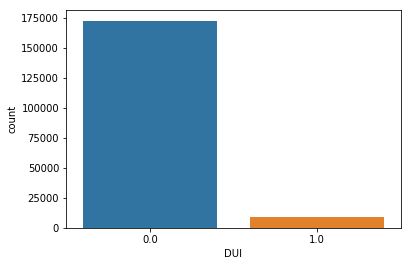

In [350]:
sns.countplot(x='DUI',data=df)
plt.show()

### Junction Type

In [351]:
#Plotting distributions for Junction Type categories
print (df['Junction Type'].value_counts())
print ()
print ("Total non-missing entries for Junction Type: ",df['Junction Type'].value_counts().sum())

Mid-Block (not related to intersection)              94254
At Intersection (intersection related)               65741
Mid-Block (but intersection related)                 23679
Driveway Junction                                    11073
At Intersection (but not related to intersection)     2436
Ramp Junction                                          164
Unknown                                                 18
Name: Junction Type, dtype: int64

Total non-missing entries for Junction Type:  197365


### Collision Type

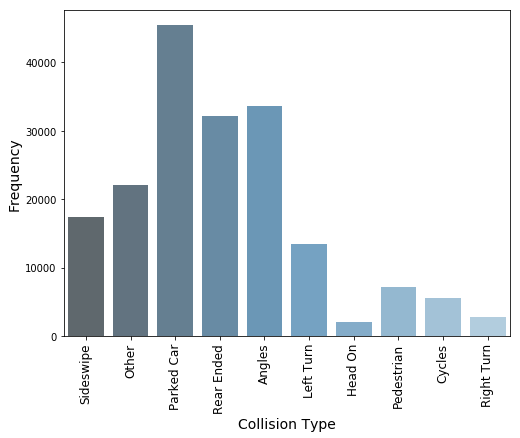

Parked Car    45384
Angles        33595
Rear Ended    32161
Other         22115
Sideswipe     17381
Left Turn     13427
Pedestrian     7139
Cycles         5570
Right Turn     2853
Head On        2043
Name: Collision Type, dtype: int64

Total non-missing entries for Collision Type:  181668


In [352]:
#Plotting distributions for Collision Type categories
plt.figure(figsize=(8,6))
sns.countplot(x='Collision Type',data=df,palette='Blues_d',alpha=0.8)
plt.xticks(rotation=90,size=12)
plt.xlabel("Collision Type",size=14)
plt.ylabel("Frequency",size=14)
plt.show()
print (df['Collision Type'].value_counts())
print ()
print ("Total non-missing entries for Collision Type: ",df['Collision Type'].value_counts().sum())

### SDOT Collision Description

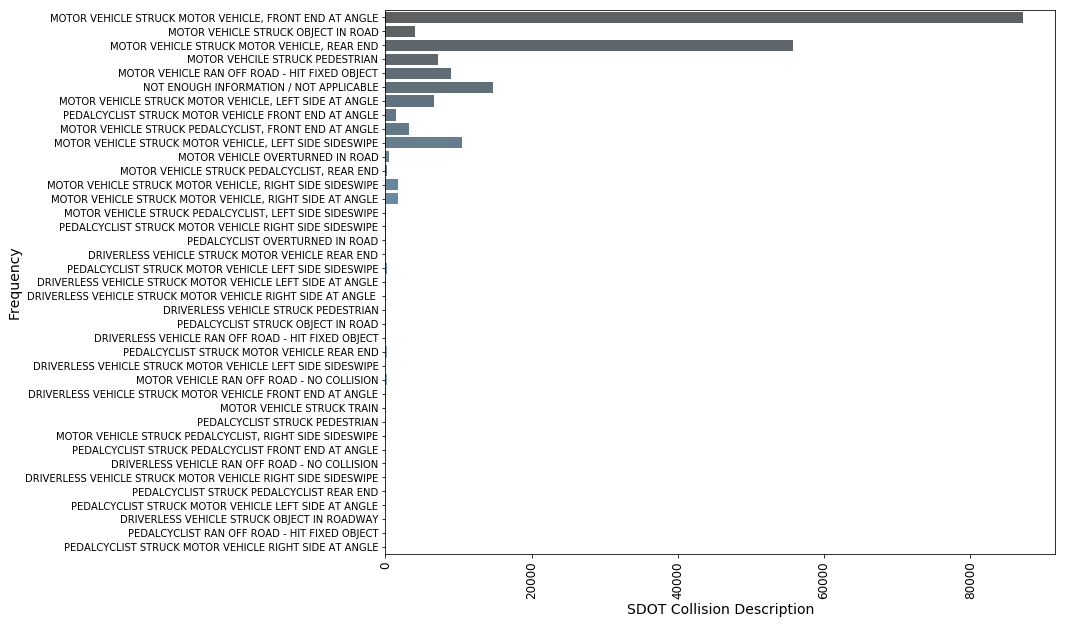

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          87229
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    55769
NOT ENOUGH INFORMATION / NOT APPLICABLE                         14766
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE         10430
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8986
MOTOR VEHCILE STRUCK PEDESTRIAN                                  7241
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           6601
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4084
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3254
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1736
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1697
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1413
MOTOR VEHICLE OVERTURNED IN ROAD                                  536
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       203
PEDALCYCLIST STRUCK 

In [353]:
#Plotting distributions for SDOT Collision Description categories
plt.figure(figsize=(12,10))
sns.countplot(y='SDOT Collision Description',data=df,palette='Blues_d',alpha=0.8)
plt.xticks(rotation=90,size=12)
plt.xlabel("SDOT Collision Description",size=14)
plt.ylabel("Frequency",size=14)
plt.show()
print (df['SDOT Collision Description'].value_counts())
print ()
print ("Total non-missing entries for SDOT Collision Description: ",df['SDOT Collision Description'].value_counts().sum())

From the distributions of the variables above, we notice that apart from the missing values, there is also a category called "Unknown" which essentially stands for missing values. Due to this, we can simply fill the missing values for these variables as "Unknown" and then handle this category separately. 

In [354]:
#Replacing null values in the following variables to the "unknown" category
df.loc[:,['Severity Description','Weather','Light Condition','Road Condition','DUI','Junction Type','Collision Type','SDOT Collision Description']] = df.loc[:,['Severity Description','Weather','Light Condition','Road Condition','DUI','Junction Type','Collision Type','SDOT Collision Description']].fillna('Unknown')
print (df['Weather'].value_counts())
print ()
print (df['Light Condition'].value_counts())
print ()
print (df['Road Condition'].value_counts())
print ()
print (df['Severity Description'].value_counts())
print ()
print (df['DUI'].value_counts())
print ()
print (df['Junction Type'].value_counts())
print ()
print (df['Collision Type'].value_counts())
print ()
print (df['SDOT Collision Description'].value_counts())

Clear or Partly Cloudy          107245
Unknown                          37706
Raining                          31474
Overcast                         26612
Snowing                            882
Other                              745
Fog/Smog/Smoke                     548
Sleet/Hail/Freezing Rain           109
Blowing Sand or Dirt or Snow        48
Severe Crosswind                    25
Name: Weather, dtype: int64

Daylight                    111552
Dark - Street Lights On      46704
Unknown                      36299
Dusk                          5711
Dawn                          2383
Dark - No Street Lights       1415
Dark - Street Lights Off      1151
Other                          179
Name: Light Condition, dtype: int64

Dry               120195
Wet                45172
Unknown            37534
Ice                 1178
Snow/Slush           988
Other                112
Standing Water       101
Sand/Mud/Dirt         64
Oil                   50
Name: Road Condition, dtype: int64

Pro

We now have all the truly missing values converted to 'Unknown'. At this point, we can summarize all the variables one more time.  

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205394 entries, 0 to 212759
Data columns (total 22 columns):
Longitude                         205394 non-null float64
Latitude                          205394 non-null float64
Status                            205394 non-null object
Address Type                      205394 non-null object
Severity Description              205394 non-null object
Collision Type                    205394 non-null object
Number of People Involved         205394 non-null int64
Number of Pedestrians Involved    205394 non-null int64
Number of Bicycles Involved       205394 non-null int64
Number of Vehicles Involved       205394 non-null int64
Number of Injuries                205394 non-null int64
Number of Serious Injuries        205394 non-null int64
Number of Fatalities              205394 non-null int64
Incident Date and Time            205394 non-null datetime64[ns]
Junction Type                     205394 non-null object
SDOT Collision Description     

### Date

We will be splitting the date variable into year, month, day of the month, day of the week and hour of the day for timeseries analysis. 

In [356]:
df['Incident Date and Time'].head()

0   2018-12-12 15:49:00
1   2018-12-16 02:44:00
2   2018-12-17 13:26:00
3   2018-12-20 02:25:00
5   2018-12-14 17:33:00
Name: Incident Date and Time, dtype: datetime64[ns]

In [357]:
df['Year'] = df['Incident Date and Time'].apply(lambda x: x.year)
df['Month'] = df['Incident Date and Time'].apply(lambda x: x.month)
df['Date'] = df['Incident Date and Time'].apply(lambda x: x.day)
df['Hour'] = df['Incident Date and Time'].apply(lambda x: x.hour)
df['Minute'] = df['Incident Date and Time'].apply(lambda x: x.minute)
df[['Year','Month','Date','Hour','Minute']].head()

,Year,Month,Date,Hour,Minute
0,2018,12,12,15,49
1,2018,12,16,2,44
2,2018,12,17,13,26
3,2018,12,20,2,25
5,2018,12,14,17,33


In [358]:
df['Hour'].value_counts().sort_index()

0     52704
1      3297
2      3452
3      1574
4      1158
5      1548
6      3046
7      6182
8      8040
9      7591
10     7030
11     7776
12     9825
13     9782
14    10168
15    11027
16    11638
17    12399
18     9337
19     6925
20     5935
21     5355
22     5203
23     4402
Name: Hour, dtype: int64

## 6. Dealing with outliers

We would only need to deal with outliers when it comes to continuous/numerical variables. Also, in this cleaning section, we will only focus on outliers which appear as a result of wrongly gathered data as opposed to extreme measurements or readings. We will deal with the latter case during the bivariate analysis with the *Severity* variable in the EDA stage. 

Here are the numerical variables remaining in the dataset: 
- Lontitude
- Latitude
- Number of People Involved         
- Number of Pedestrians Involved    
- Number of Bicycles Involved       
- Number of Vehicles Involved       
- Number of Injuries                
- Number of Serious Injuries        
- Number of Fatalities    
- Crosswalk
- Lane Segment

### Longitude

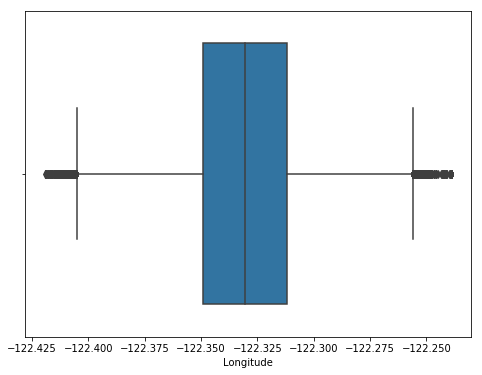

In [359]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Longitude'])
plt.show()

### Latitude

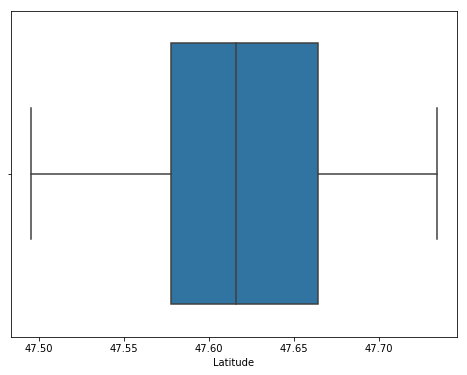

In [360]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Latitude'])
plt.show()

The distributions for *Latitude* and *Longitude* look reasonable and there don't appear to be any outliers. Realistically, the only kinds of outliers we would typically expect for coordinates are wrongly gathered data as opposed to an extreme reading or measurement. 

### Number of People Involved

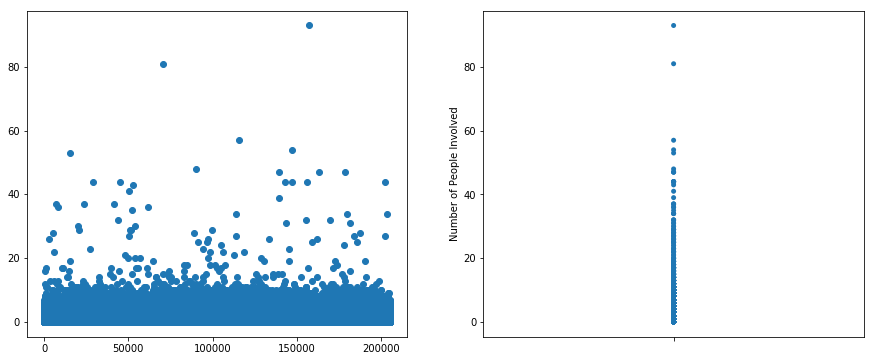

In [361]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(range(len(df['Number of People Involved'])),df['Number of People Involved'])
plt.subplot(1,2,2)
sns.stripplot(y='Number of People Involved',data=df)
plt.show()

There are two noticeable outliers in the plot above, both of which are above 80 while the rest of the distribution lies below 60. Despite being ouliers relative to the main body of the distribution, we keep this points in the dataset as they could be useful for predicting the less frequent severity categories. 

### Number of Pedestrians Involved

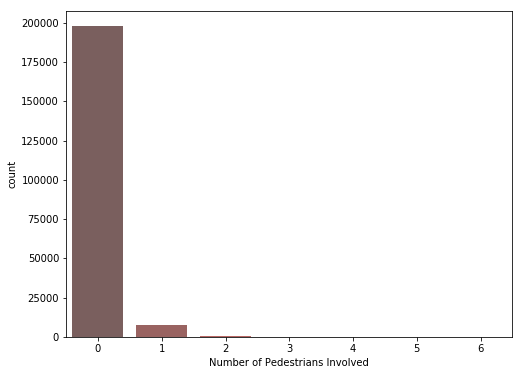

0    197867
1      7236
2       257
3        24
4         7
5         2
6         1
Name: Number of Pedestrians Involved, dtype: int64

In [362]:
plt.figure(figsize=(8,6))
sns.countplot(x='Number of Pedestrians Involved',data=df,palette='Reds_d',alpha=0.8)
plt.show()
df['Number of Pedestrians Involved'].value_counts()

As the number of pedestrians involved are represented by just a handful of values, they can be treated in the same manner as discrete values. Therefore, we can visualize them in a bar chart as shown above. We notice that in most collisions, no pedestrians were involved while there was 1 pedestrians in 7236 of the cases. There were 2, 3, 4, 5 and 6 pedestrians involved for 257, 24, 7, 2 and 1 of the cases respectively. Apart from the distinct class imbalance in this variable, there is no concern for outliers. 

### Number of Vehicles Involved

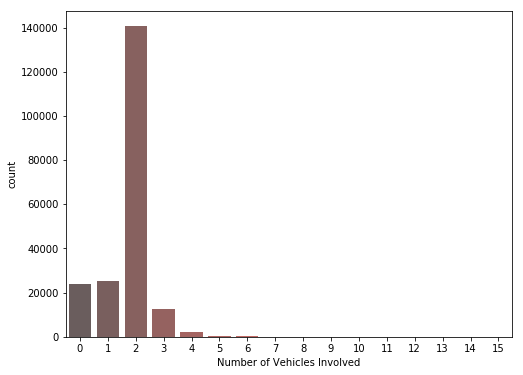

2     140676
1      25194
0      23940
3      12488
4       2351
5        516
6        147
7         45
8         17
9          9
11         5
10         2
15         1
14         1
13         1
12         1
Name: Number of Vehicles Involved, dtype: int64

In [363]:
plt.figure(figsize=(8,6))
sns.countplot(x='Number of Vehicles Involved',data=df,palette='Reds_d',alpha=0.8)
plt.show()
df['Number of Vehicles Involved'].value_counts()

The variable for number of vehicles displays a slightly more balanced distribution but also does not appear to contain any outliers. 

### Number of Bicycles Involved

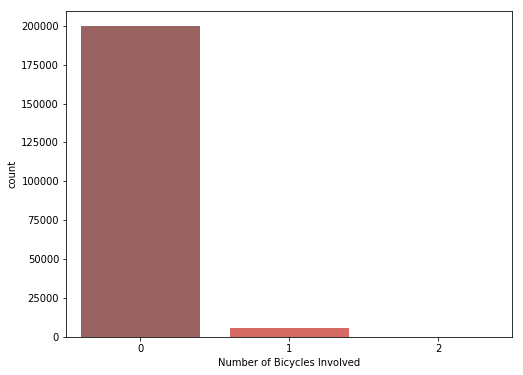

0    199755
1      5589
2        50
Name: Number of Bicycles Involved, dtype: int64

In [364]:
plt.figure(figsize=(8,6))
sns.countplot(x='Number of Bicycles Involved',data=df,palette='Reds_d',alpha=0.8)
plt.show()
df['Number of Bicycles Involved'].value_counts()

Once again, there are no outliers for the bicycles variable while the distribution is extremely imbalanced. 

### Number of Injuries

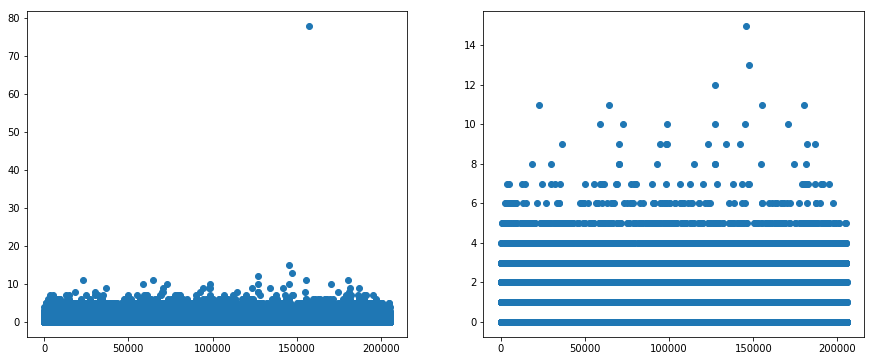

In [365]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(range(len(df['Number of Injuries'])),df['Number of Injuries'])
plt.subplot(1,2,2)
plt.scatter(range(len(df[df['Number of Injuries']<50]['Number of Injuries'])),df[df['Number of Injuries']<50]['Number of Injuries'])
plt.show()

For the number of injuries variable, there is one obvious outlier close to 80. However, the rest of the values are all below 20. The second plot above shows the distribution with the outlier filtered out. The second plot provides a better understanding of the data so we get rid of the outlier. 

### Number of Serious Injuries

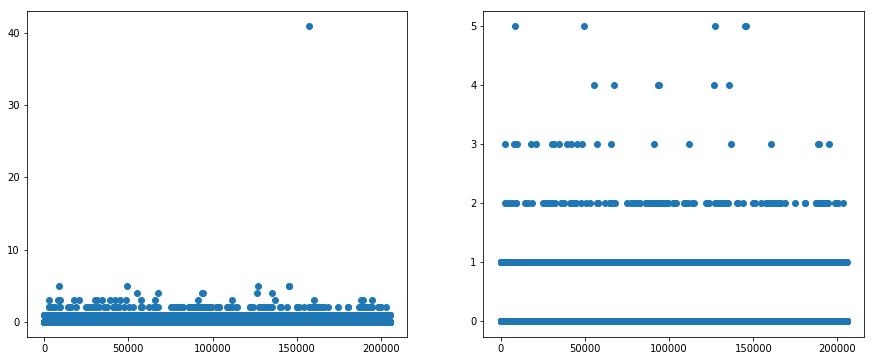

In [366]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(range(len(df['Number of Serious Injuries'])),df['Number of Serious Injuries'])
plt.subplot(1,2,2)
plt.scatter(range(len(df[df['Number of Serious Injuries']<40]['Number of Serious Injuries'])),df[df['Number of Serious Injuries']<40]['Number of Serious Injuries'])
plt.show()

Similar to the number of injuries, the number of serious injuries variable also contains an obvious outlier. Without the outlier, the values are all below 6. 

### Number of Fatalities

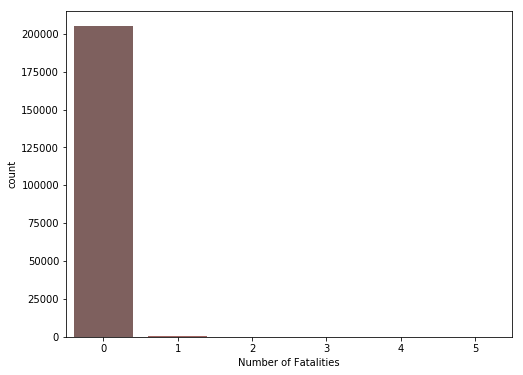

0    205075
1       304
2        11
3         2
5         1
4         1
Name: Number of Fatalities, dtype: int64

In [367]:
plt.figure(figsize=(8,6))
sns.countplot(x='Number of Fatalities',data=df,palette='Reds_d',alpha=0.8)
plt.show()
df['Number of Fatalities'].value_counts()

The number of fatalities is highly imbalanced which is expected since most crashes will not result in a death. 

### Status

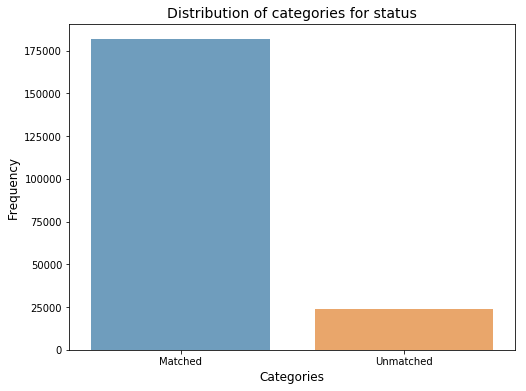

In [368]:
#Plotting the categorical distribution for the STATUS variable
plt.figure(figsize=(8,6))
plt.title("Distribution of categories for status",size=14)
sns.countplot(x='Status',data=df,alpha=0.7)
plt.xlabel("Categories",size=12)
plt.ylabel("Frequency",size=12)
plt.show()

### Hit Parked Car

The *HITPARKEDCAR* variable is already split into 'Y' and 'N' entries but the data is highly skewed towards 'N' values. 

Categorical frequencies for whether a parked car was hit
N    195431
Y      9963
Name: Hit Parked Car, dtype: int64


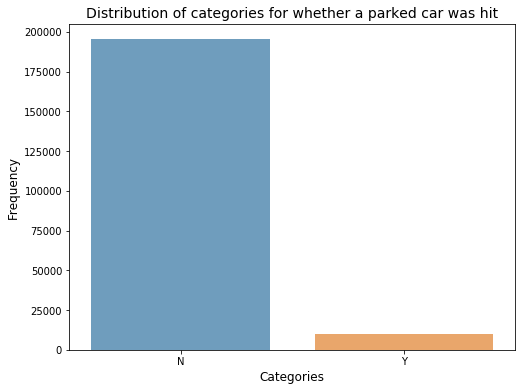

In [369]:
print ("Categorical frequencies for whether a parked car was hit")
print (df['Hit Parked Car'].value_counts())

#Plotting the categorical distribution for the HITPARKEDCAR variable
plt.figure(figsize=(8,6))
plt.title("Distribution of categories for whether a parked car was hit",size=14)
sns.countplot(x='Hit Parked Car',data=df,alpha=0.7)
plt.xlabel("Categories",size=12)
plt.ylabel("Frequency",size=12)
plt.show()

## 7. Exporting the cleaned dataset

We do a final check on the dataframe below before exporting it out to a CSV file. 

In [370]:
df.shape

(205394, 27)

In [371]:
df.head()

,Longitude,Latitude,Status,Address Type,Severity Description,Collision Type,Number of People Involved,Number of Pedestrians Involved,Number of Bicycles Involved,Number of Vehicles Involved,...,Weather,Road Condition,Light Condition,STATE Collision Description,Hit Parked Car,Year,Month,Date,Hour,Minute
0,-122.292141,47.536087,Matched,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,Raining,Wet,Daylight,From same direction - both going straight - bo...,N,2018,12,12,15,49
1,-122.335422,47.598752,Matched,Block,Property Damage Only Collision,Other,1,0,0,1,...,Raining,Wet,Dark - Street Lights On,Fixed object,N,2018,12,16,2,44
2,-122.331579,47.598746,Matched,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,Overcast,Dry,Daylight,From same direction - both going straight - bo...,N,2018,12,17,13,26
3,-122.334188,47.571578,Matched,Block,Property Damage Only Collision,Other,2,0,0,1,...,Raining,Wet,Dark - Street Lights On,Fixed object,N,2018,12,20,2,25
5,-122.337348,47.520472,Matched,Block,Injury Collision,Sideswipe,2,0,0,2,...,Clear or Partly Cloudy,Dry,Dark - Street Lights On,From same direction - both going straight - bo...,N,2018,12,14,17,33


In [372]:
#Writing cleaned dataset to working directory for next step
df.to_csv('cleaned_dataset.csv')